# ***Flanker Task (slow event-related)***

On each trial (inter-trial interval (ITI) varied between 8s and 14s, with a mean of ITI=12 s),participants used one of two buttons on a response pad to indicate the direction of a central arrow in an array of 5 arrows. In congruent trials the flanking arrows pointed in the same direction as the central arrow (e.g., <<<<<), while in more demanding incongruent trials the flanking arrows pointed in the opposite direction (e.g., <<><<).

Subjects performed two 5-minute blocks, each containing 12 congruent and 12 incongruent trials, presented in a pseudorandom order.

This experiment yields evidence for Posner's theory of different visual attention networks (see [this](https://www.frontiersin.org/articles/10.3389/fpsyg.2012.00064/full) for more information).

In [1]:
# importing the packages necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *
from sklearn.linear_model import LinearRegression

# import the needed data and turn Condition, as well as Block into a categorical value (helps with distinction in plots)
data = pd.read_csv("data/data.csv")
data["Block"] = data["Block"].astype("category")
data["Condition"] = data["Condition"].astype("category")
data["Response"] = data["Response"].astype("category")
data["StimVar"] = data["StimVar"].astype("category")

First of all, it might always be a good idea to look at the data itself and see which kinds of variables we have into which the data is structured. In this dataset, we have a total of 7 variables filled with 1248 entries each, where each lines represents exactly one trial. ***Response***, ***Condition*** and ***Block*** are categorical variables indicating whether the response in a trial was corret, the trial type and block affiliation of each trial.
***Response*** can be seen as a bool variable, since its entries vary between 0 and 1. The variable ***StimVar*** is a categorical variable as well, since the central arrow can either point to left or right which was realized with the two entry-values 1 and 2.
The variable ***Onset*** contains time stamps to which the stimuli were presented to the subject.
Finally, ***RT*** comprizes the reaction times in ms. It is quite obvious that we will probably include a lot of plots that focus on reaction times grouped after categorical variables available in the dataset or appende throughout the analysis.

In [2]:
data

,SubjectID,Response,StimVar,Condition,Onset,RT,Block
0,1,1,2,incongruent,0,1095,1
1,1,1,2,incongruent,10,988,1
2,1,1,1,congruent,20,591,1
3,1,1,1,congruent,30,499,1
4,1,1,2,incongruent,40,719,1
...,...,...,...,...,...,...,...
1243,26,1,1,congruent,220,575,2
1244,26,1,1,congruent,234,544,2
1245,26,1,2,incongruent,248,476,2
1246,26,1,2,incongruent,260,534,2


## ***Removing outliers via z-test***

In order to remove all outliers depending on reaction time, we use the z-test which calculates the measure zi as the distance of xi from the mean µ in terms of the standard deviation σ. We then consider all trials with a z-value greater than 3 outliers and remove them from the dataset. This procedure is repeated until there are no outlier-trials left in the dataset.

In [3]:
while True:
    # calculate the mean and standard deviation
    mean = np.mean(data["RT"])
    sd = np.std(data["RT"])

    # calculate z-values for all data points and append them in a separate column:
    rows, cols = data.shape
    data["z_value"] = np.zeros(rows)
    for row in data.itertuples(index = True, name = "Row"):
        index = row[0]
        value = row[6]
        data.at[index, "z_value"] = abs(value - mean)/ sd

    # find index of data point with largest z-value
    z_max = data["z_value"].idxmax()

    # check if said data point is an outlier
    if z_max > 3:
        # remove whiole line from the data
        data = data.drop(z_max)
    # stop if no more outliers are found
    else:
        break

        
# update the indices in the df and have a brief look at it:
rows, cols = data.shape
# indices = np.arange(rows)
data = data.set_index(np.arange(rows))

data

,SubjectID,Response,StimVar,Condition,Onset,RT,Block,z_value
0,1,1,2,incongruent,0,1095,1,2.724970
1,1,1,2,incongruent,10,988,1,2.093342
2,1,1,1,congruent,20,591,1,0.250174
3,1,1,1,congruent,30,499,1,0.793256
4,1,1,2,incongruent,40,719,1,0.505418
...,...,...,...,...,...,...,...,...
1191,26,1,1,congruent,220,575,2,0.344623
1192,26,1,1,congruent,234,544,2,0.527618
1193,26,1,2,incongruent,248,476,2,0.929027
1194,26,1,2,incongruent,260,534,2,0.586649


## ***Data Visualization***

### ***Histogram***

First of all, let's have a look at the distribution of reaction times. A suitable kind of plot is a histogram showing how often value ranges appear in the dataset.

In [2]:
(ggplot(data, aes(x = "RT"))
    + geom_histogram(binwidth = 50, color = "#FFA500", fill = "#FFA500", alpha = 0.4)
    + labs(
        x = "Reaction Time",
        y = "Number of Occurrences",
        title = "Distribution of Reaction Times"
    )
)

plotnine.ggplot.ggplot

As we can see, most of the reaction times are concentrated on an interval between 450 and 700ms. The average reaction time is located in this interval. It can be seen, that there are still a few quite fast outliers to the lower end of the plot und some reaction times even exceed 1 second.

### ***Violin Plot***

Since we have several blocks, there could be an effect of practice.

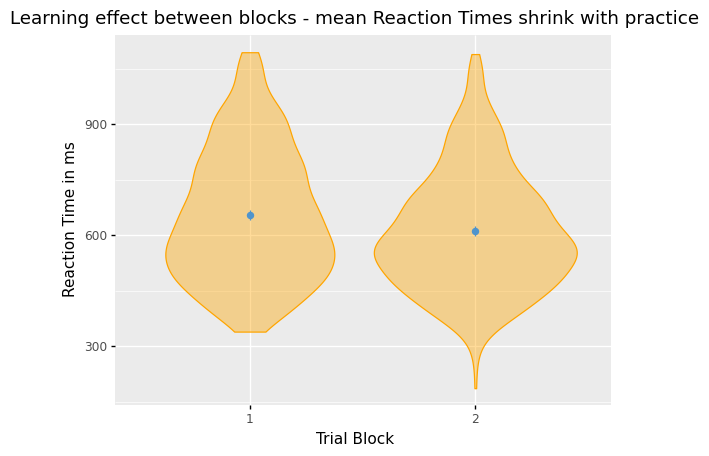

<ggplot: (-9223363303515664696)>

In [5]:
(ggplot(data, aes(x='Block', y='RT')) 
 + geom_violin(fill = "#FFA500", color = "#FFA500", alpha = 0.4)
 + stat_summary(color = "#4F94CD")
 + labs(
     x = "Trial Block",
     y = "Reaction Time in ms",
     title = "Learning effect between blocks - mean Reaction Times shrink with practice"
 )
)

The summary statistic (blue point in the middle) is slightly lower for block two which indicates an effect of practice between the two blocks. It is not possible to say though that this may not only be due to growing accustomed to the setting. It is further possible to see that the violin for block one s slightly wider on top, while block two pulls further towards the quicker reaction times on the bottom. 
Overall, we can definitely see an increase of speed over the course of the two blocks.

### ***Scatterplot***

Including a wider variety of data into the plots can be helpful to find some value interactions.

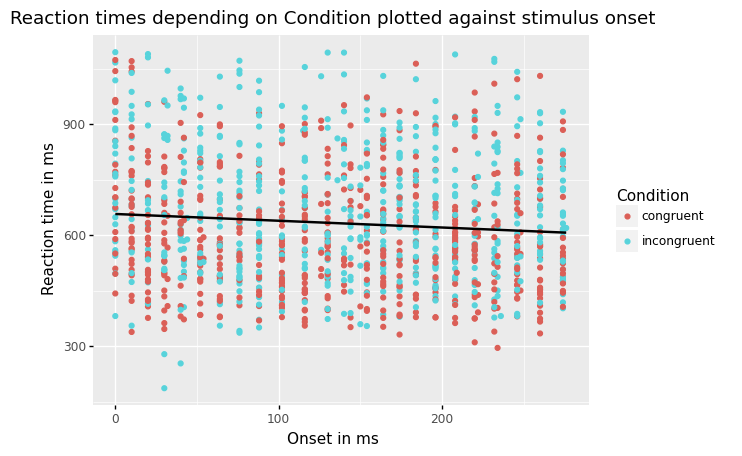

<ggplot: (8733339058636)>

In [6]:
(ggplot(data, aes(x = "Onset", y = "RT", color = "Condition"))
 + geom_point()
 + geom_smooth(method = "lm", color = "black", se = False)
 + labs(
     x = "Onset in ms",
     y = "Reaction time in ms",
     title = "Reaction times depending on Condition plotted against stimulus onset"
 )
)

### ***Comparison Barplot***

Let's then combine some of the information we hae already included in several plots into one! We want to see the relation between the mean reaction times of the two conditions (congruent and incongruent) distributed over the two practice blocks. In order to construct that, we first have to gain our data though.

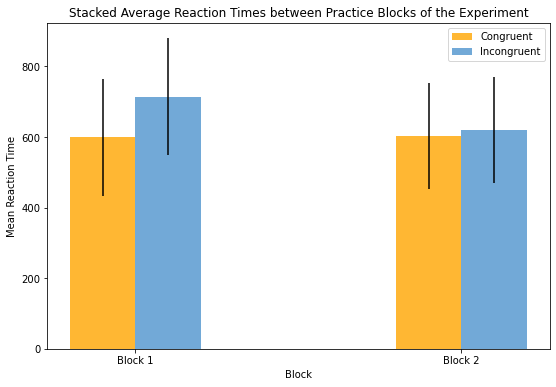

In [7]:
# obtain mean and standard deviation (std) grouped after block && condition
data_block_one = data.loc[data['Block'] == 1]
data_block_two = data.loc[data['Block'] == 2]
congruent_one, incongruent_one = data_block_one.groupby('Condition')['RT'].mean()
congruent_two, incongruent_two = data_block_two.groupby('Condition')['RT'].mean()
std_congruent_one, std_incongruent_one = data_block_one.groupby("Condition")["RT"].std()
std_congruent_two, std_incongruent_two = data_block_two.groupby("Condition")["RT"].std()

# creating a dataframe with obtained values
dataframe = pd.DataFrame({"Block" : [1, 2],
            "RT_congruent" : [congruent_one, congruent_two],
            "std_congruent" : [std_congruent_one, std_congruent_two],
            "RT_incongruent" : [incongruent_one, incongruent_two],
            "std_incongruent" : [std_incongruent_one, std_incongruent_two]})


fig, ax = plt.subplots(figsize = (9, 6))
ax.bar([0.9, 1.9], 
    dataframe["RT_congruent"],
    label='Congruent',
    yerr = dataframe["std_congruent"], 
    color = "#FFA500",
    width = 0.2,
    alpha = 0.8)

ax.bar([1.1, 2.1], 
    dataframe["RT_incongruent"], 
    label='Incongruent',
    yerr = dataframe["std_congruent"], 
    color = "#4F94CD", 
    width = 0.2, 
    alpha = 0.8)

# adding customizations:
ax.set(
    xlabel = "Block",
    ylabel = "Mean Reaction Time",
    title = "Stacked Average Reaction Times between Practice Blocks of the Experiment"
)
ax.set_xticks([1, 2])
ax.set_xticklabels(["Block 1", "Block 2"])
ax.legend()

We see that between the blocks, the average reaction times in the congruent condition do not differ significantly and so do the mean reaction times in both conditions in the second block. What differs though, are the mean reaction times in the incongruent condition between the two block. The average reaction time differs by nearly 100ms which means a significant increase of reaction speed in the second block that could be due to practice and habituation.

## ***Additional: Linear Regression Model***

Sometimes, in order to see whether a hypothesis is true or whether it has to be falsified, it is helpful to construct a linear regression model. Linear regression models try to find features that make predicting data possible based on observations (here, these observations are the dat points in our dataframe).

As an example, let's test the hypothesis that there is a certain relation - correlation - between the values of the metric variables ***Onset*** and ***RT***. We use the **sklearn**-package to construct a very basic linear regression model which we feed with our prepared data columns x and y. The x-column is a pandas series that was reshaped and converted into a two-dimensional numpy-array. The y-column could be handed over as a pandas series right away.

In [12]:
# prepare x and y:
x = np.array(data["Onset"]).reshape(-1, 1)
y = data["RT"]

model_onset = LinearRegression().fit(x, y)

# obtain the results:
print('correlation coefficient:', model_onset.score(x, y))
print('intercept:', model_onset.intercept_)
print('slope:', model_onset.coef_)

correlation coefficient: 0.007908892239208543
intercept: 657.8356007007781
slope: [-0.18275439]


After looking at the correlation coefficient, it is not even necessary to scrutinize the rest of the results, since the model shows that there is close to no relation between the variables Onset and RT. This means that we have no statistical evidence for a correlation and would not be able to predict any values for reaction times based on the variable ***Onset***. Another hypothesis that could be tested, though, is whether there actually is a relation between ***Condition*** or ***Block*** and reaction time, since we could see the biggest variance there. A siginificant correlation between reaction times and ***Condition*** would speak for the fact that the other arrows around the central arrow actually are a ditractor for the participants. A substantial correlation between ***Block*** and reaction times would mean that there is a practice effect between the two sessions.

Further testing could be done by analyzing whether there is an interaction term between ***Condition*** and ***Block*** to predict reaction times.
